In [172]:
import pandas_datareader.data as web
import datetime
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import math

In [194]:
prices = web.DataReader('GOOGL','yahoo',start=datetime.datetime(2017,1,1),end=datetime.datetime(2017,2,2))['Close']

In [195]:
prices

Date
2017-01-03    808.010010
2017-01-04    807.770020
2017-01-05    813.020020
2017-01-06    825.210022
2017-01-09    827.179993
2017-01-10    826.010010
2017-01-11    829.859985
2017-01-12    829.530029
2017-01-13    830.940002
2017-01-17    827.460022
2017-01-18    829.020020
2017-01-19    824.369995
2017-01-20    828.169983
2017-01-23    844.429993
2017-01-24    849.530029
2017-01-25    858.450012
2017-01-26    856.979980
2017-01-27    845.030029
2017-01-30    823.830017
2017-01-31    820.190002
2017-02-01    815.239990
2017-02-02    818.260010
2017-02-03    820.130005
Name: Close, dtype: float64

In [196]:
math.log(prices[-2]/prices[-1])

-0.0022827236432082076

In [199]:
def monte_sim(num_sim, pred_days, prices):
    list_sim = pd.DataFrame()
    for sim in range(num_sim):
        volatility = prices.std()
        pred_days_price = list()
        pred_days_price.append(prices[-1])
        for days in range(pred_days):
            pred_days_price.append(np.random.normal(pred_days_price[-1],volatility))
            #volatility = math.log(pred_days_price[-2]/pred_days_price[-1])
        list_sim[sim] = pred_days_price
        plt.plot(np.arange(pred_days+1),pred_days_price)
    plt.title("Simulation of Stock Prices for 100 days")
    plt.ylabel("Price in USD$")
    plt.xlabel("Days")
    plt.show()
    return list_sim


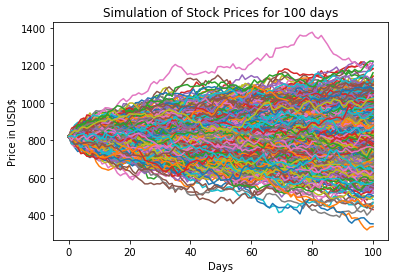

In [200]:
df_sim = monte_sim(num_sim=1000,pred_days=100,prices=prices)   

In [201]:
last_day_price_list = df_sim.iloc[-1,:]


In [202]:
n, bins,d  = plt.hist(last_day_price_list,bins=20, alpha =0.4)


In [203]:
from scipy.stats import norm

In [204]:

fit = mlab.normpdf(bins, last_day_price_list.mean(),last_day_price_list.std())
plt.plot(bins, fit, 'r--')

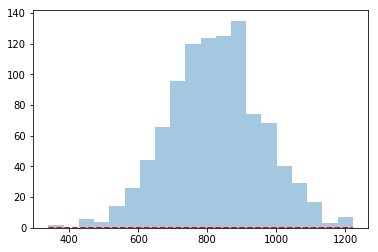

In [205]:
plt.show()

In [206]:
fit

array([  5.11055545e-06,   1.54296654e-05,   4.19221646e-05,
         1.02501371e-04,   2.25535251e-04,   4.46578667e-04,
         7.95756693e-04,   1.27603155e-03,   1.84137104e-03,
         2.39122250e-03,   2.79445714e-03,   2.93882484e-03,
         2.78130576e-03,   2.36876814e-03,   1.81549541e-03,
         1.25217937e-03,   7.77207020e-04,   4.34115878e-04,
         2.18209378e-04,   9.87051779e-05,   4.01795663e-05])

In [207]:
bins

array([  339.95632174,   384.03933323,   428.12234471,   472.2053562 ,
         516.28836768,   560.37137917,   604.45439066,   648.53740214,
         692.62041363,   736.70342512,   780.7864366 ,   824.86944809,
         868.95245958,   913.03547106,   957.11848255,  1001.20149403,
        1045.28450552,  1089.36751701,  1133.45052849,  1177.53353998,
        1221.61655147])

In [208]:
plt.plot(bins,fit)

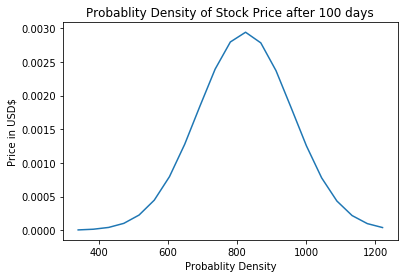

In [209]:
plt.title("Probablity Density of Stock Price after 100 days")
plt.xlabel("Probablity Density")
plt.ylabel("Price in USD$")
plt.show()

In [210]:
np.percentile(last_day_price_list.sort_values(),16)

691.17974679072893

In [211]:
last_day_price_list.mean()

823.8835177086494

In [212]:
last_day_price_list.std()

135.7453334647591

In [223]:
abov_165 = last_day_price_list > np.percentile(last_day_price_list.sort_values(),97.5)
blow_90 = last_day_price_list < np.percentile(last_day_price_list.sort_values(),2.5)

In [224]:
sum(abov_165|blow_90)

50

In [226]:
random.gauss(1,1)

0.0572317430780207